## DATA EXPLORATION & PREPARATION (15 points)

In [1]:
direction_encode = {'right': 0, 'left': 1, 'up': 2, 'straight': 3}
eyewear_encode = {'open': 0, "sunglasses":1}

In [6]:
from PIL import Image
import os, os.path
import numpy as np


X_data = []
files = "./TrainingSet"
for myFile in os.listdir(files):
    image_array = np.array(Image.open( files+ "/" + myFile ).convert('L')).flatten() #here i'm reaching the file and taking images and putting 
    X_data.append (image_array) #them into array and flattening each of them also i'm appending these files to list
X_train = np.array(X_data) # converting my list to array

directionlist = []
for myFiles in os.listdir(files): 
    class_label = myFiles.split("_")[1] #here is i'm doing split to take direction part in the file name.
    directionlist.append(direction_encode[class_label]) #i'm collecting my values in list 
y_train_direction = np.array(directionlist) # converting my list to array



X_datatest = []
testfiles = "./TestSet"
for myFile_test in os.listdir(testfiles):
    image_array2 = np.array(Image.open( testfiles + "/" + myFile_test ).convert('L')).flatten() 
    X_datatest.append (image_array2) #i did same thing here as i did above nothing different
X_test = np.array(X_datatest)


directionlist_test = []
for myFiles3 in os.listdir(testfiles):
    test_label = myFiles3.split("_")[1]  #here is i'm doing split to take direction part in the filename.
    directionlist_test.append(direction_encode[test_label])
y_test_direction = np.array(directionlist_test)

eyelist = []
for myFiles2 in os.listdir(files): 
    class_label2 = myFiles2.split("_")[3]   #reaching files and splitting first with "_" then with "." to get rid of JPG part 
    class_labelname = class_label2.split(".")[0] # so i can get open or sunglasses part in filename.
    eyelist.append(eyewear_encode[class_labelname])
y_train_eyewear = np.array(eyelist)


eyelist_test = []
for myFiles4 in os.listdir(testfiles):
    test_label2 = myFiles4.split("_")[3]
    test_labelname = test_label2.split(".")[0]  #same as i did above. exactly same things! but for test files.
    eyelist_test.append(eyewear_encode[test_labelname])
y_test_eyewear = np.array(eyelist_test)

In [7]:
# DON'T ERASE THIS PART
print(sum(X_train[3][3:6]))
print(sum(y_train_direction[-6:]))
print(sum(X_test[3][3:6]))
print(sum(y_test_direction[-6:]))
print(sum(y_train_eyewear[-6:]))
print(sum(y_test_eyewear[-6:]))

24
12
104
12
3
3


## CLASSIFICATION MODEL TO PREDICT DIRECTION FACED (40 points)

### part a

In [10]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1,0.5,1.0], 'tol':[0.0001,0.001], 'decision_function_shape':('ovo','ovr')}
svc= svm.SVC(random_state=0)  #first giving parameters and defining svc 
clf = GridSearchCV(svc, parameters, cv=5,scoring= "accuracy") # then try to find best parameters by gridsearch
clf.fit(X_train, y_train_direction) #fitting data

C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 0.5, 1.0], 'decision_function_shape': ('ovo', 'ovr'), 'tol': [0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
from sklearn.metrics import accuracy_score
predicted_labels = clf.predict(X_train)  #having prediction for train data
best_parameters = clf.best_params_  #to get best parameters
training_accuracy = accuracy_score(y_train_direction, predicted_labels)  #to observe training accuracy
validation_accuracy = clf.best_score_ # best_score_ gives validation score


In [12]:
print(best_parameters)
print(training_accuracy)
print(validation_accuracy)

{'kernel': 'linear', 'C': 0.1, 'decision_function_shape': 'ovo', 'tol': 0.0001}
1.0
0.8063492063492064


### part b

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
predictiontest = clf.predict(X_test)  #having prediction for test data to get accuracy
test_accuracy = accuracy_score(y_test_direction,predictiontest)  # having test accuracy
test_precision = precision_score(y_test_direction,predictiontest, average="weighted") # having test_precision
test_recall = recall_score(y_test_direction,predictiontest, average="weighted") # having test recall score

In [14]:
print(test_accuracy)
print(test_precision)
print(test_recall)

0.9888888888888889
0.9893939393939394
0.9888888888888889


Did your model perform well on both training and test data? If no, does it underfit or overfit? Write your answer the corresponding cell in the template with a precise explanation. Write your answer below.


it performed well on both training and test data. but there is little difference that it performed in training data better than test. 

### part c

In [15]:
from sklearn import svm
svc1= svm.SVC(kernel= 'linear', C=0.1, decision_function_shape='ovo', tol= 0.0001,random_state=0)
#here i'm defining my svc with best parameters that i found in part a


In [16]:
traindata = []
testdata = []
ilist = []
for i in range(15,316,15): 
    svc1.fit(X_train[:i], y_train_direction[:i])   #fitting data to my model with i steps 
    X_train_predict = svc1.predict(X_train)  # having training prediction for accuracy score
    X_test_predict = svc1.predict(X_test) # having test prediction for accuracy score
    training_misclassified =1 -  accuracy_score(y_train_direction,X_train_predict) #finding misclassified by using accuracy and
    test_misclassified =1 -  accuracy_score(y_test_direction,X_test_predict) # subtracting from 1
    traindata.append(training_misclassified) # keeping this data in list to show in learning curve
    testdata.append(test_misclassified)
    ilist.append(i) # i have to keep "i" as well to draw my learning curve healthier

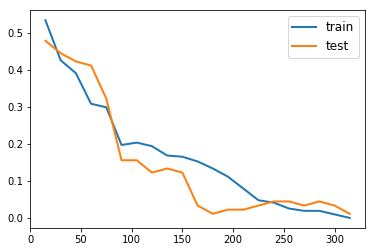

In [17]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(ilist, traindata,linewidth=2, label='train')  # here drawing learning curve of train data by using misclassified samples
plt.plot(ilist, testdata,linewidth=2, label='test') # and here for test data
plt.legend(loc="upper right", fontsize=12)  # for text
plt.show()

## CLASSIFICATION MODEL TO PREDICT EYEWEAR (25 points)

### part d

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1,0.5,1.0], 'tol':[0.0001,0.001], 'decision_function_shape':('ovo','ovr')}
svc_eye= svm.SVC(random_state=0)
clf_eye = GridSearchCV(svc_eye, parameters, cv=5,scoring= "accuracy")
clf_eye.fit(X_train, y_train_eyewear)  # i did same things that i have done for direction data like defining svc and looking for
#best parameters in given parameters by gridsearch method

C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 0.5, 1.0], 'decision_function_shape': ('ovo', 'ovr'), 'tol': [0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
from sklearn.linear_model import LogisticRegression

parameters_lr = {'penalty':('l1', 'l2'), 'C':[0.001, 0.01, 0.1]} # they are parameters for logistic regression
lr = LogisticRegression(random_state=0, solver = "saga") # here i'm defining logistic regression
clf_lr_eye = GridSearchCV(lr, parameters_lr, cv=5,scoring= "accuracy")  # searching best paramters for logistic regression
clf_lr_eye.fit(X_train, y_train_eyewear)


C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
predicted_labels_eye = clf_eye.predict(X_train) # prediction with svc
predicted_labels_lr_eye = clf_lr_eye.predict(X_train) # prediction with logistic reg

In [21]:
best_parameters_SVC = clf_eye.best_params_  #best parameters of svc
best_parameters_LR = clf_lr_eye.best_params_ # best paramters of lr

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
training_accuracy_SVC =accuracy_score(y_train_eyewear, predicted_labels_eye) #having training accuracy for svc model
validation_accuracy_SVC = clf_eye.best_score_ # validation score for svc model

In [23]:
training_accuracy_LR = accuracy_score(y_train_eyewear, predicted_labels_lr_eye) # training accuracy for lr model
validation_accuracy_LR = clf_lr_eye.best_score_ # validation score for lr model

In [24]:
print("SVC RESULTS")
print(best_parameters_SVC)
print(training_accuracy_SVC)
print(validation_accuracy_SVC)
print("\nLR RESULTS")
print(best_parameters_LR)
print(training_accuracy_LR)
print(validation_accuracy_LR)

SVC RESULTS
{'kernel': 'poly', 'C': 0.1, 'decision_function_shape': 'ovo', 'tol': 0.0001}
1.0
0.6222222222222222

LR RESULTS
{'penalty': 'l2', 'C': 0.001}
1.0
0.5968253968253968


### part e

In [25]:
SVC_preds = clf_eye.predict(X_test) # using same model SVC that i've created above and predicting with test data
LR_preds = clf_lr_eye.predict(X_test) # using same model LR that i've created above and predicting with test data 
#so i will decide which model will work better

In [26]:
accuracy_SVC = accuracy_score(y_test_eyewear,SVC_preds) # calculating accuracy for test data with SVC model
precision_SVC = precision_score(y_test_eyewear,SVC_preds, average="weighted") #its precision
recall_SVC =recall_score(y_test_eyewear,SVC_preds, average="weighted") #its recall score

In [27]:
accuracy_LR = accuracy_score(y_test_eyewear,LR_preds) #calculating accuracy for test data with LR model
precision_LR = precision_score(y_test_eyewear,LR_preds, average="weighted") # its precision
recall_LR =recall_score(y_test_eyewear,LR_preds, average="weighted") #its recall score

In [28]:
print("SVC RESULTS")
print(accuracy_SVC)
print(precision_SVC)
print(recall_SVC)
print("\nLR RESULTS")
print(accuracy_LR)
print(precision_LR)
print(recall_LR)

SVC RESULTS
0.7777777777777778
0.7791184850008379
0.7777777777777778

LR RESULTS
0.7333333333333333
0.7333333333333333
0.7333333333333333


Which model’s performance is the best? Write your answer below.

SVC model performances is better than LR as it is seen above. In SVC results, accuracy, precision and recall are higher than LR results.

### part f

Do Logistic Regression and SVC models perform well on both training and test data? If no, do they underfit or overfit? Write your answer below. 

They do not perform very well. Because they are overfitting. While training accuracy is 1.0 validation accuracies are low. 

## MODEL EXPLORATION - EYEWEAR PREDICTION (20 points)

In this part, you will try to increase accuracy on X_test (Remember that you should never use test data for training and model tuning. Do the model selection/tuning with cross validation on training data). You may use different models or parameters (Notice that, so far, you tried only a small list of values for parameters such C in the grid search). You may also try to extract new features from images. Your aim is to get a higher test accuracy than the one you got in part (f).

In [55]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[1,0.0001,0.001,0.1], 'max_iter' : [10,50,100,150], 'C':[0.1,0.2,0.08,0.04,0.01], 'tol':[0.0001,0.00015,0.00001]}
svc_final= svm.SVC(random_state=0, kernel ='poly',decision_function_shape='ovo')
clf_final = GridSearchCV(svc_final, parameters, cv=5,scoring= "accuracy")
clf_final.fit(X_train, y_train_eyewear)
print(clf_final.best_params_)  #here i was trying to do same things that i've done above like using svc and looking best parameters
# but i found more parameters to give gridsearcher and find better accuracy. as it is seen i have more varieties of paramaters
# i printed best parameters to observe the difference between this and previous one


C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'max_iter': 50, 'tol': 0.0001, 'gamma': 1}


In [8]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#final_pred_train = clf_final.predict(X_train)   # i tried test data with best paramaters but it did not give me better accuracy
#final_pred_test = clf_final.predict(X_test)   # as it is seen clf_final is my model here and i tried with this but accuracy 
#train_accuracy = accuracy_score(y_train_eyewear, final_pred_train) # lower than i found and i was trying to give different 
#test_accuracy =  accuracy_score(y_test_eyewear, final_pred_test) #parameters but it was taking a lot time. so i decided to try
 # manually as it is seen below. so i did not want to run this code because of confusion of variables. i will leave all of it 
# as a comment. if you like to run you can do it as well. thanks!

In [13]:
model = svm.SVC(random_state = 0, kernel ='poly',decision_function_shape='ovo', max_iter = 100, C = 1, tol = 0.0001, gamma = 0.0001)
#in the line above, i was trying different parameters because as i mentioned above grid search working so slow,
#and i found max_iter = 100 have better accuracy with test data 
model.fit(X_train, y_train_eyewear) # my aim was trying to increase test data so i do not work with model that i found the best
final_pred_train = model.predict(X_train) # for training data. so it is different and i have better accuracy even if it's so little
final_pred_test = model.predict(X_test) # here i'm predicting.
train_accuracy = accuracy_score(y_train_eyewear, final_pred_train)
test_accuracy =  accuracy_score(y_test_eyewear, final_pred_test)

C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [14]:
print(train_accuracy)
print(test_accuracy)

1.0
0.7888888888888889


In [31]:
# training accuracy still 1.0 and test accuracy increased from 0.77777 to 0.788889 :)) 